# Budget Analysis

---

## Environment Setup

In [1]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline

In [2]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
# Set environment variables from the .env file
load_dotenv()

True

In [4]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [5]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

client.Institutions.get(2)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112060',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Bank (Broadus, MT) - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': []},
  {'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': True,
   'input_spec': 'fixed',
   'institution_id': 'ins_112062',
   'mfa': ['code', 'list', 'questions', 'selections'],
   'mfa_code_type': 'numeric',
   'name': '1st Constitution Bank - Personal',
   'oauth': False,
   'products': ['assets',
    'auth',


In [6]:
# Set the institution id
INSITUTION_ID = "ins_109508"

### 2. Generate a public token

In [7]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSITUTION_ID,['assets', 'auth', 'transactions', 'income', 'identity'])

# Print the public token
print(create_tkn_response)

{'public_token': 'public-sandbox-dbef538c-5518-4ae4-a24a-b22493dbb31a', 'request_id': 'QFYm0XcB1ZwVqwM'}


### 3. Exchange the public token for an access token

In [8]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

# Print the access toke
print(access_token)

access-sandbox-e325b6d9-d8d3-4b38-ad9c-c6aac8d68ef1


In [9]:
# Store the access token in a Python variable
access_token_variable = access_token

### 4. Fetch Accounts

In [10]:
# Retrieve accounts
client.Accounts.get(access_token_variable)

# Print accounts


{'accounts': [{'account_id': '7xzyVm7VdbhpWAAknwBVFyJAbVXAreTgLaBn9',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'eGNeJ3lJ7XuwKPPBD4qzhZ4bnQlb3WcL1X35N',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'QdbPW6wWvMHwyxxL63Doh75lARNloJTpEnl71',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [11]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print the transactions
print(json.dumps(transaction_response['transactions'][:],indent=4, sort_keys=True))

[
    {
        "account_id": "ZZlzj6XjrMHjMQQdZeNmuJB5kq95LWfgVv1XE",
        "account_owner": null,
        "amount": 500,
        "authorized_date": null,
        "category": [
            "Travel",
            "Airlines and Aviation Services"
        ],
        "category_id": "22001000",
        "date": "2020-05-30",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "United Airlines",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pendi

### 2. Print the categories for each transaction

In [12]:
# Create a for-loop to print the categories for each transaction
cat = []
cat = [sub['category'][0] for sub in transaction_response['transactions'] ]#if sub['category'][0] not in cat]
cat = list(set(cat))
print(cat)

['Payment', 'Shops', 'Transfer', 'Recreation', 'Food and Drink', 'Travel']


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [13]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
columns=['date', 'name', 'amount', 'category']

# Retrieve all the transactions
transactions = transaction_response['transactions']

# Populate the transactions DataFrame with the transactions data
full_list = []
for count, i in enumerate(transactions, start = 0):
    temp_list = [i['date'], i['name'], i['amount'], i['category'][0]]
    full_list.append(temp_list)

# Display sample data from the DataFrame    
df = pd.DataFrame(full_list, columns = columns)
df.head()

,date,name,amount,category
0,2020-05-30,United Airlines,500.00,Travel
1,2020-05-28,Uber,6.33,Travel
2,2020-05-25,Tectra Inc,500.00,Food and Drink
3,2020-05-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment
4,2020-05-24,KFC,500.00,Food and Drink


In [14]:
# columns=['date', 'name', 'amount', 'category']
# df = pd.DataFrame(columns=columns)
# def retrieve_transactions(column):
#     temp_list = []
#     for i in range(len(transaction_response['transactions'])):
#         if column != 'category':
#             data = transaction_response['transactions'][i][column]
#             temp_list.append(data)
#         else:
#             data = transaction_response['transactions'][i][column][0] # for 'category' should use the first label in the list, we need to do it separately.
#             temp_list.append(data) 
#     return temp_list
# for i in columns:
#     df[i] = retrieve_transactions(i)
# df.head()

### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [15]:
# Display data types
print(df.dtypes)

date         object
name         object
amount      float64
category     object
dtype: object


In [16]:
# Make any required data type transformation
# convert_dict = {'amount': float}

In [17]:
# Set the date column as index
df.index = pd.to_datetime(df['date'])
df = df.drop(columns=['date'])

# Display sample data
df.head()

,name,amount,category
date,,,
2020-05-30,United Airlines,500.00,Travel
2020-05-28,Uber,6.33,Travel
2020-05-25,Tectra Inc,500.00,Food and Drink
2020-05-24,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2020-05-24,KFC,500.00,Food and Drink


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [18]:
# Fetch de income data
income_response = client.Income.get(access_token_variable)

# Print the income data
client.Income.get(access_token_variable)

{'income': {'income_streams': [{'confidence': 0.99,
    'days': 690,
    'monthly_income': 500,
    'name': 'UNITED AIRLINES'}],
  'last_year_income': 6000,
  'last_year_income_before_tax': 7285,
  'max_number_of_overlapping_income_streams': 1,
  'number_of_income_streams': 1,
  'projected_yearly_income': 6085,
  'projected_yearly_income_before_tax': 7389},
 'request_id': 'MYkc69aNYaUqqNr'}

In [19]:
#print(json.dumps(income_response['income'][:3],indent=4, sort_keys=True))

In [20]:
# Determine the previous year's gross income and print the results
previous_year = income_response['income']['last_year_income_before_tax']
print(f'Previous Year: ${previous_year}')

Previous Year: $7285


In [21]:
# Determine the current monthly income and print the results
current_monthly = income_response['income']['income_streams'][0]['monthly_income']
print(f'Current Monthly: ${current_monthly}')

Current Monthly: $500


In [22]:
# Determine the projected yearly income and print the results
projected_income = income_response['income']['projected_yearly_income_before_tax']
print(f'Projected Income: ${projected_income}')

Projected Income: $7389


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [23]:
# Compute the total expenses per category 
expenses = df.groupby('category').sum()
        
# Display the expenses per catefory
expenses

,amount
category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000222A2115608>],
      dtype=object)

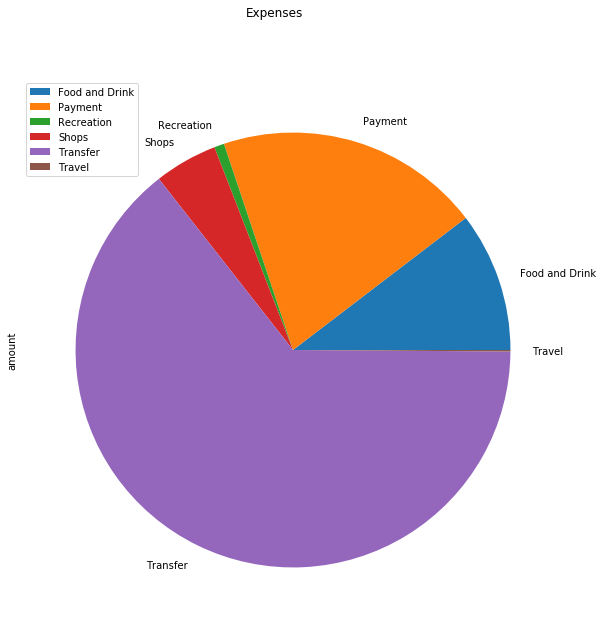

In [43]:
# Create a spending categories pie chart.
expenses.plot(kind='pie', title='Expenses', subplots=True, figsize=(20,10))

### Calculate the expenses per month

In [25]:
# Create a DataFrame with the total expenses
monthly_expenses = df.groupby(pd.Grouper(freq='M')).sum()
# Display sample data
monthly_expenses.head()

,amount
date,
2020-03-31,10645.24
2020-04-30,10645.24
2020-05-31,10645.24


In [26]:
monthly_expenses = df.groupby(by=[df.index.month, df.index.year]).sum()
monthly_expenses.head()

,,amount
date,date,
3,2020,10645.24
4,2020,10645.24
5,2020,10645.24


Text(0, 0.5, 'Amount')

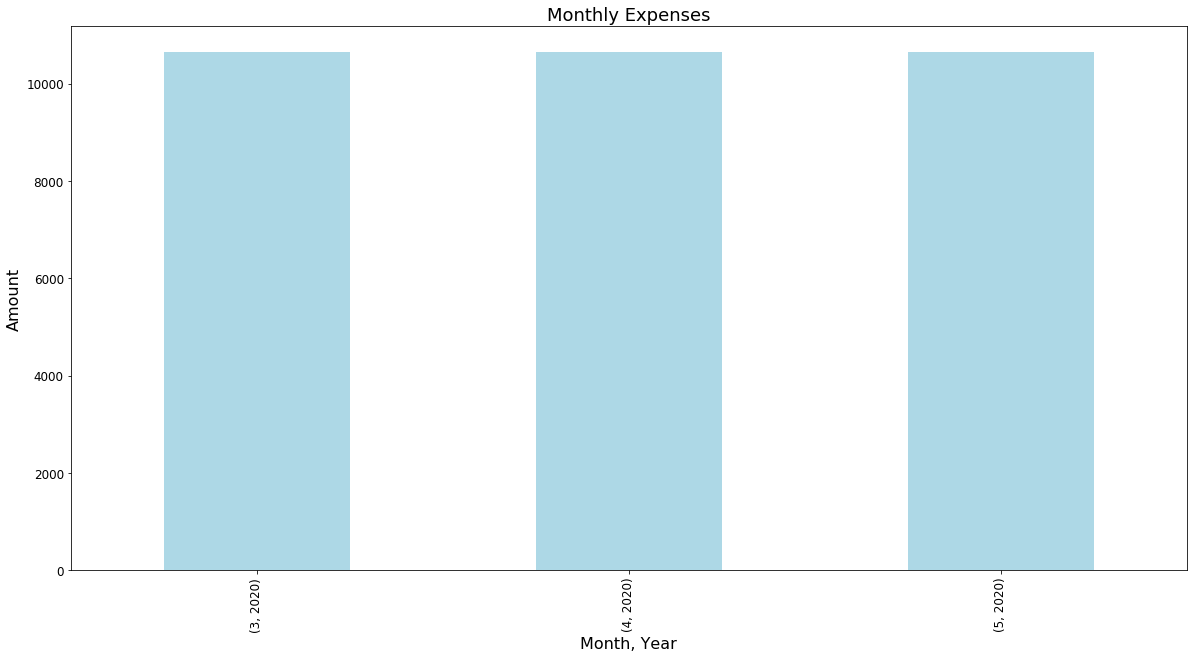

In [37]:
# Create a spending per month bar chart
ax = monthly_expenses['amount'].plot(kind='bar', figsize = (20,10), color='lightblue', fontsize=12); 
ax.set_alpha(0.8)
ax.set_title('Monthly Expenses', fontsize=18)
ax.set_xlabel('Month, Year', fontsize=16)
ax.set_ylabel('Amount', fontsize=16)

In [44]:
#monthly_expenses.plot.bar(figsize = (20,10))